### Pandas means Panel data analysis library

1. It is good for tabular data, like Excel spreadsheet, but much more powerful
1. Today's tutorial is more like a sketch, I will point out resources for more in-depth tutorials
1. I will cover key functions of pandas so you can finish Assignment 1 and research project
1. You may require functions outside this tutorial when dealing with research project. You should google it first, read documentation, and I will provide help if necessary

In [1]:
# import our beautiful libraries
import pandas as pd
import numpy as np

In [2]:
# Let's get some data and put into pandas,
# reading from my server on Amazon Cloud, you realise I am using the same data from MFIN6201 class...
asset = pd.read_csv('https://mfin6201.s3.amazonaws.com/company_assets.csv')

In [3]:
# inspect the data
asset

,permno,datadate,fyear,at
0,25881.00,1970-12-31,1970.00,33.45
1,25881.00,1971-12-31,1971.00,29.33
2,25881.00,1972-12-31,1972.00,19.91
3,25881.00,1973-12-31,1973.00,21.77
4,25881.00,1974-12-31,1974.00,25.64
...,...,...,...,...
275429,15904.00,2015-12-31,2015.00,94.44
275430,15904.00,2016-12-31,2016.00,69.94
275431,15904.00,2017-12-31,2017.00,66.59
275432,16469.00,2016-12-31,2016.00,28.43


In [4]:
# to list out the columns, just convert it a list
list(asset)

['permno', 'datadate', 'fyear', 'at']

In [5]:
# or call the columns attribute
asset.columns

Index(['permno', 'datadate', 'fyear', 'at'], dtype='object')

In [6]:
# I can rename the columns, 
asset.columns = ['firm_id','date','fyear','asset']

In [7]:
# For now, I will just convert it back
asset.columns = ['permno', 'datadate', 'fyear', 'at']

In [8]:
# or you can print the first few rows
asset.head() # asset.head(10) to print first 10 rows, asset.tail()  for last rows

,permno,datadate,fyear,at
0,25881.00,1970-12-31,1970.00,33.45
1,25881.00,1971-12-31,1971.00,29.33
2,25881.00,1972-12-31,1972.00,19.91
3,25881.00,1973-12-31,1973.00,21.77
4,25881.00,1974-12-31,1974.00,25.64


In [9]:
# to read documentation of particular commands, type ? after it
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]],
    sep=',',
    delimiter=None,
    header='infer',
    names=None,
    index_col=None,
    usecols=None,
    squeeze=False,
    prefix=None,
    mangle_dupe_cols=True,
    dtype=None,
    engine=None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace=False,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    na_values=None,
    keep_default_na=True,
    na_filter=True,
    verbose=False,
    skip_blank_lines=True,
    parse_dates=False,
    infer_datetime_format=False,
    keep_date_col=False,
    date_parser=None,
    dayfirst=False,
    cache_dates=True,
    iterator=False,
    chunksize=None,
    compression='infer',
    thousands=None,
    decimal: str = '.',
    lineterminator=None,
    quotechar='"',
    quoting=0,
    doublequote=True,
    escapechar=None,
    comment=None,
    encoding=None,
    dialect=None,
    error_bad_lines=True,
    warn_bad_l

In [10]:
# get info for the current dataset
asset.info()
# object Dtype suggesting Pandas does not exactly what type is it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275434 entries, 0 to 275433
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   permno    275434 non-null  float64
 1   datadate  275434 non-null  object 
 2   fyear     275434 non-null  float64
 3   at        275434 non-null  float64
dtypes: float64(3), object(1)
memory usage: 8.4+ MB


In [11]:
# get summary stats for the current dataset
asset.describe() # analogue to stata's sum. but much better and versatile

,permno,fyear,at
count,275434.00,275434.00,275434.00
mean,55996.28,1992.91,5379.40
std,27540.62,14.47,58916.37
min,10000.00,1950.00,0.00
25%,29154.00,1983.00,33.54
50%,61065.00,1994.00,163.20
75%,80928.00,2004.00,955.14
max,93436.00,2018.00,3771199.85


In [12]:
# I can print more stats
asset.describe([0.01,0.05,0.10,0.25,0.5,0.75,0.9,0.95,0.99]) 

,permno,fyear,at
count,275434.00,275434.00,275434.00
mean,55996.28,1992.91,5379.40
std,27540.62,14.47,58916.37
min,10000.00,1950.00,0.00
1%,10272.00,1956.00,1.66
5%,11574.00,1968.00,4.96
10%,14219.00,1973.00,9.73
25%,29154.00,1983.00,33.54
50%,61065.00,1994.00,163.20
75%,80928.00,2004.00,955.14


In [13]:
# stats are easy to get
print(asset['at'].mean())
print(asset['at'].std())
print(asset['at'].median())

5379.399488421908
58916.36621132359
163.20499999999998


In [14]:
# let's convert datadate to proper datetime values so we can work with it
# we can extract a column by doing selection
asset['datadate']

0         1970-12-31
1         1971-12-31
2         1972-12-31
3         1973-12-31
4         1974-12-31
             ...    
275429    2015-12-31
275430    2016-12-31
275431    2017-12-31
275432    2016-12-31
275433    2017-12-31
Name: datadate, Length: 275434, dtype: object

In [15]:
# use pandas built-in function to convert it to datetime values

In [16]:
pd.to_datetime(asset['datadate'])

0        1970-12-31
1        1971-12-31
2        1972-12-31
3        1973-12-31
4        1974-12-31
            ...    
275429   2015-12-31
275430   2016-12-31
275431   2017-12-31
275432   2016-12-31
275433   2017-12-31
Name: datadate, Length: 275434, dtype: datetime64[ns]

In [17]:
# of course, you can browse the documentation of this command
pd.to_datetime?

Signature:
pd.to_datetime(
    arg,
    errors='raise',
    dayfirst=False,
    yearfirst=False,
    utc=None,
    format=None,
    exact=True,
    unit=None,
    infer_datetime_format=False,
    origin='unix',
    cache=True,
)
Docstring:
Convert argument to datetime.

Parameters
----------
arg : int, float, str, datetime, list, tuple, 1-d array, Series DataFrame/dict-like
    The object to convert to a datetime.
errors : {'ignore', 'raise', 'coerce'}, default 'raise'
    - If 'raise', then invalid parsing will raise an exception.
    - If 'coerce', then invalid parsing will be set as NaT.
    - If 'ignore', then invalid parsing will return the input.
dayfirst : bool, default False
    Specify a date parse order if `arg` is str or its list-likes.
    If True, parses dates with the day first, eg 10/11/12 is parsed as
    2012-11-10.
    with day first (this is a known bug, based on dateutil behavior).
yearfirst : bool, default False
    Specify a date parse order if `arg` is str or its

In [18]:
# we need to overwrite the old column
asset['datadate'] = pd.to_datetime(asset['datadate'])

In [19]:
asset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275434 entries, 0 to 275433
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   permno    275434 non-null  float64       
 1   datadate  275434 non-null  datetime64[ns]
 2   fyear     275434 non-null  float64       
 3   at        275434 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 8.4 MB


In [20]:
# Let's print out histgram, to display graph within Jupyter notebook, we need one magic command
%matplotlib inline

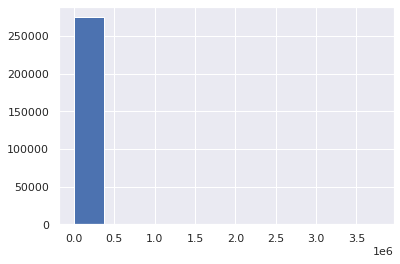

In [21]:
asset['at'].hist()

In [22]:
# seems many small firms
# Let's select large firms using boolean indexing
asset['at']>100 # this gives us a list of boolean values, we can use this to subset dataset

0         False
1         False
2         False
3         False
4         False
          ...  
275429    False
275430    False
275431    False
275432    False
275433    False
Name: at, Length: 275434, dtype: bool

In [23]:
asset[asset['at']>10000]

,permno,datadate,fyear,at
555,21020.00,1989-12-31,1989.00,10877.40
556,21020.00,1990-12-31,1990.00,13353.60
557,21020.00,1991-12-31,1991.00,16208.00
558,21020.00,1992-12-31,1992.00,18706.00
559,21020.00,1993-12-31,1993.00,19326.00
...,...,...,...,...
275398,14406.00,2015-12-31,2015.00,10190.20
275399,14406.00,2016-12-31,2016.00,10054.10
275400,14406.00,2017-12-31,2017.00,10252.40
275427,16496.00,2016-12-31,2016.00,86720.00


In [24]:
# save the results to a new dataframeb
large_firms = asset[asset['at']>10000]  # asset values are in million USD

In [25]:
# you can pass multiple arguments as selector
asset[(asset['at']>10000) & (asset['permno']<20000)]

,permno,datadate,fyear,at
1099,10560.00,2000-12-31,2000.00,11255.00
1100,10560.00,2001-12-31,2001.00,11707.00
1101,10560.00,2002-12-31,2002.00,10931.00
1102,10560.00,2003-12-31,2003.00,10185.00
2091,11042.00,1996-12-31,1996.00,19861.98
...,...,...,...,...
275398,14406.00,2015-12-31,2015.00,10190.20
275399,14406.00,2016-12-31,2016.00,10054.10
275400,14406.00,2017-12-31,2017.00,10252.40
275427,16496.00,2016-12-31,2016.00,86720.00


In [26]:
# & is and operator, | is or operator
asset[(asset['at']>10000) | (asset['permno']<20000)]

,permno,datadate,fyear,at
8,10015.00,1983-12-31,1983.00,14.08
9,10015.00,1984-12-31,1984.00,16.27
10,10015.00,1985-12-31,1985.00,39.49
11,10023.00,1972-12-31,1972.00,15.68
12,10031.00,1983-12-31,1983.00,8.53
...,...,...,...,...
275429,15904.00,2015-12-31,2015.00,94.44
275430,15904.00,2016-12-31,2016.00,69.94
275431,15904.00,2017-12-31,2017.00,66.59
275432,16469.00,2016-12-31,2016.00,28.43


In [27]:
# You can select a subset by columns
asset[['permno','fyear','at']]

,permno,fyear,at
0,25881.00,1970.00,33.45
1,25881.00,1971.00,29.33
2,25881.00,1972.00,19.91
3,25881.00,1973.00,21.77
4,25881.00,1974.00,25.64
...,...,...,...
275429,15904.00,2015.00,94.44
275430,15904.00,2016.00,69.94
275431,15904.00,2017.00,66.59
275432,16469.00,2016.00,28.43


In [28]:
# You can select a subset by columns, by passing a list to the selection
asset[['permno','fyear','at']]

,permno,fyear,at
0,25881.00,1970.00,33.45
1,25881.00,1971.00,29.33
2,25881.00,1972.00,19.91
3,25881.00,1973.00,21.77
4,25881.00,1974.00,25.64
...,...,...,...
275429,15904.00,2015.00,94.44
275430,15904.00,2016.00,69.94
275431,15904.00,2017.00,66.59
275432,16469.00,2016.00,28.43


In [29]:
# or subseting columns and rows at the same time, using loc function
asset.loc[asset['at']>10000, ['permno','fyear','at']]
# the syntax is df[rows, columns]

,permno,fyear,at
555,21020.00,1989.00,10877.40
556,21020.00,1990.00,13353.60
557,21020.00,1991.00,16208.00
558,21020.00,1992.00,18706.00
559,21020.00,1993.00,19326.00
...,...,...,...
275398,14406.00,2015.00,10190.20
275399,14406.00,2016.00,10054.10
275400,14406.00,2017.00,10252.40
275427,16496.00,2016.00,86720.00


In [30]:
# to select entire rows or columns, use :

In [31]:
asset.loc[:,['permno','fyear','at']]

,permno,fyear,at
0,25881.00,1970.00,33.45
1,25881.00,1971.00,29.33
2,25881.00,1972.00,19.91
3,25881.00,1973.00,21.77
4,25881.00,1974.00,25.64
...,...,...,...
275429,15904.00,2015.00,94.44
275430,15904.00,2016.00,69.94
275431,15904.00,2017.00,66.59
275432,16469.00,2016.00,28.43


In [32]:
asset.loc[asset['at']>10000,:]

,permno,datadate,fyear,at
555,21020.00,1989-12-31,1989.00,10877.40
556,21020.00,1990-12-31,1990.00,13353.60
557,21020.00,1991-12-31,1991.00,16208.00
558,21020.00,1992-12-31,1992.00,18706.00
559,21020.00,1993-12-31,1993.00,19326.00
...,...,...,...,...
275398,14406.00,2015-12-31,2015.00,10190.20
275399,14406.00,2016-12-31,2016.00,10054.10
275400,14406.00,2017-12-31,2017.00,10252.40
275427,16496.00,2016-12-31,2016.00,86720.00


In [33]:
# Let's take log of the asset values so the distribution will be more "normal"
np.log(asset['at'])

/home/leo/.local/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0        3.51
1        3.38
2        2.99
3        3.08
4        3.24
         ... 
275429   4.55
275430   4.25
275431   4.20
275432   3.35
275433   3.37
Name: at, Length: 275434, dtype: float64

In [34]:
asset['ln_at'] = np.log(asset['at']+1)

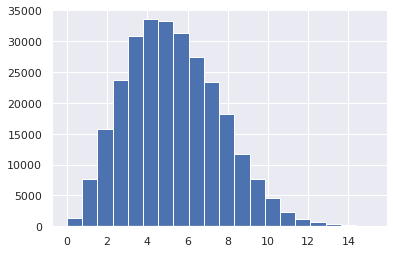

In [35]:
asset['ln_at'].hist(bins=20) # better, more "normal"

In [36]:
asset

,permno,datadate,fyear,at,ln_at
0,25881.00,1970-12-31,1970.00,33.45,3.54
1,25881.00,1971-12-31,1971.00,29.33,3.41
2,25881.00,1972-12-31,1972.00,19.91,3.04
3,25881.00,1973-12-31,1973.00,21.77,3.13
4,25881.00,1974-12-31,1974.00,25.64,3.28
...,...,...,...,...,...
275429,15904.00,2015-12-31,2015.00,94.44,4.56
275430,15904.00,2016-12-31,2016.00,69.94,4.26
275431,15904.00,2017-12-31,2017.00,66.59,4.21
275432,16469.00,2016-12-31,2016.00,28.43,3.38


In [37]:
# you can see that np function works on the entire series (column)
# you can use math function to work with individual values, but slower

In [38]:
import math

In [39]:
math.log(2)

0.6931471805599453

In [40]:
# math module cannot work with a series
# math.log(asset['at'])

In [41]:
# you need to map the normal python moduel function to series
# this may looks crazy to you, but this is how it works
(asset['at']+1).map(math.log)

0        3.54
1        3.41
2        3.04
3        3.13
4        3.28
         ... 
275429   4.56
275430   4.26
275431   4.21
275432   3.38
275433   3.41
Name: at, Length: 275434, dtype: float64

In [42]:
# you can map any abitrary function
def crazy_function(series_element):
    return math.sin(series_element)**2 + math.cos(series_element)**2

In [43]:
(asset['at']).map(crazy_function)

0        1.00
1        1.00
2        1.00
3        1.00
4        1.00
         ... 
275429   1.00
275430   1.00
275431   1.00
275432   1.00
275433   1.00
Name: at, Length: 275434, dtype: float64

In [44]:
# of course, for numeric computation, it is easier and more efficient just use numpy
# map and other function to perform row-wise operation is just give you the freedom 
# especially non-numeric operations

np.sin(asset['at'])**2 + np.cos(asset['at'])**2

0        1.00
1        1.00
2        1.00
3        1.00
4        1.00
         ... 
275429   1.00
275430   1.00
275431   1.00
275432   1.00
275433   1.00
Name: at, Length: 275434, dtype: float64

In [45]:
# if you want to work with multiple columns at the same time, you can use "apply"
# Suppose you want to multiple permno with at for crazy reasons, you can
# Here, lambda expression is used to work with apply, it can define any arbitraty function on the fly
# Apply can only accept function as input
asset.apply(lambda df:df['permno'] * df['at'],axis=1)

0         865719.45
1         759089.73
2         515213.07
3         563455.25
4         663537.08
            ...    
275429   1501894.24
275430   1112278.05
275431   1059126.88
275432    468147.79
275433    480697.17
Length: 275434, dtype: float64

In [46]:
# you can, define a function beforehand
def multiply_permno_and_at(df):
    return df['permno'] * df['at']

In [47]:
asset.apply(multiply_permno_and_at,axis=1)

0         865719.45
1         759089.73
2         515213.07
3         563455.25
4         663537.08
            ...    
275429   1501894.24
275430   1112278.05
275431   1059126.88
275432    468147.79
275433    480697.17
Length: 275434, dtype: float64

In [48]:
# of course, for numerical operations, it is more efficient to use normal syntax
# Again, that is just to give the freedom
asset['permno'] * asset['at']

0         865719.45
1         759089.73
2         515213.07
3         563455.25
4         663537.08
            ...    
275429   1501894.24
275430   1112278.05
275431   1059126.88
275432    468147.79
275433    480697.17
Length: 275434, dtype: float64

In [49]:
# now let's deal with missing values, we do not have missing values in the data, then I will just create some
# the loc function I showed you earlier, actually gives the access to the dataframe itself
asset.loc[asset.permno>80000,'at']

508        303.23
509        277.66
510         97.96
511         44.90
512         45.64
           ...   
275294   40286.49
275295   39702.79
275387    2886.65
275388    2966.32
275389    3133.73
Name: at, Length: 75958, dtype: float64

In [50]:
# you can directly change its value, the missing value in pandas is represented as np.nan
# You can do None as in Python, but it's not the pandas way
asset.loc[asset.permno>80000,'at'] = np.nan

In [51]:
# Now the asset value for permno > 80000 is all missing (not a number)
asset[asset.permno>80000]

,permno,datadate,fyear,at,ln_at
508,80071.00,1994-07-31,1994.00,nan,5.72
509,80071.00,1995-07-31,1995.00,nan,5.63
510,80071.00,1996-07-31,1996.00,nan,4.59
511,80071.00,1997-07-31,1997.00,nan,3.83
512,80071.00,1998-07-31,1998.00,nan,3.84
...,...,...,...,...,...
275294,92793.00,2016-12-31,2016.00,nan,10.60
275295,92793.00,2017-12-31,2017.00,nan,10.59
275387,89139.00,2015-12-31,2015.00,nan,7.97
275388,89139.00,2016-12-31,2016.00,nan,8.00


In [52]:
# reflected in the info
asset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275434 entries, 0 to 275433
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   permno    275434 non-null  float64       
 1   datadate  275434 non-null  datetime64[ns]
 2   fyear     275434 non-null  float64       
 3   at        199476 non-null  float64       
 4   ln_at     275434 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 10.5 MB


In [53]:
# we can, fill with some default values
asset.fillna(0) # this will fill 0 to entire dataframe

# More carefully, we just fill 0 to the at
asset['at'].fillna(0)

0        33.45
1        29.33
2        19.91
3        21.77
4        25.64
          ... 
275429   94.44
275430   69.94
275431   66.59
275432   28.43
275433   29.19
Name: at, Length: 275434, dtype: float64

In [54]:
# you can fill with some other value, for example, we can fill with average value for this data
asset['at'].fillna(asset.mean())

0        33.45
1        29.33
2        19.91
3        21.77
4        25.64
          ... 
275429   94.44
275430   69.94
275431   66.59
275432   28.43
275433   29.19
Name: at, Length: 275434, dtype: float64

In [55]:
# Above commands will not change the value of the df
asset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275434 entries, 0 to 275433
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   permno    275434 non-null  float64       
 1   datadate  275434 non-null  datetime64[ns]
 2   fyear     275434 non-null  float64       
 3   at        199476 non-null  float64       
 4   ln_at     275434 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 10.5 MB


In [56]:
# you need to fill inplace in order to change the value of the actual df
asset['at'].fillna(0,inplace=True)

In [57]:
# Let's create missing values again to talk about some more stuff
# This time let's say fyear 2000, we have missing values
asset.loc[asset.fyear==2000,'at'] = np.nan

In [58]:
# more sensible way is to fillna with average within the numbers reported by the company

In [59]:
asset[asset.permno==54594][lambda df:(df.fyear<2005) & (df.fyear>1996)]

,permno,datadate,fyear,at,ln_at
44,54594.00,1998-05-31,1997.00,670.56,6.51
45,54594.00,1999-05-31,1998.00,726.63,6.59
46,54594.00,2000-05-31,1999.00,741.00,6.61
47,54594.00,2001-05-31,2000.00,nan,6.56
48,54594.00,2002-05-31,2001.00,710.20,6.57
49,54594.00,2003-05-31,2002.00,686.62,6.53
50,54594.00,2004-05-31,2003.00,709.29,6.57
51,54594.00,2005-05-31,2004.00,732.23,6.60


In [60]:
# we can use groupby function, which we will talk about it later
asset['at'] = asset.groupby('permno')['at'].transform(lambda x:x.fillna(x.mean()))

In [61]:
asset[asset.permno==54594][lambda df:(df.fyear<2005) & (df.fyear>1996)]

,permno,datadate,fyear,at,ln_at
44,54594.00,1998-05-31,1997.00,670.56,6.51
45,54594.00,1999-05-31,1998.00,726.63,6.59
46,54594.00,2000-05-31,1999.00,741.00,6.61
47,54594.00,2001-05-31,2000.00,671.73,6.56
48,54594.00,2002-05-31,2001.00,710.20,6.57
49,54594.00,2003-05-31,2002.00,686.62,6.53
50,54594.00,2004-05-31,2003.00,709.29,6.57
51,54594.00,2005-05-31,2004.00,732.23,6.60


In [62]:
# Groupby operations
# what is the average asset reported for each firm?

# using group by firm, this will return a series
asset.groupby('permno')['at'].mean()

permno
10000.00      2.12
10001.00     73.55
10002.00   1061.82
10003.00    348.87
10005.00      1.54
             ...  
93432.00      0.00
93433.00      0.00
93434.00      0.00
93435.00      0.00
93436.00      0.00
Name: at, Length: 24105, dtype: float64

In [63]:
asset.groupby('permno')['at'].mean().reset_index()

,permno,at
0,10000.00,2.12
1,10001.00,73.55
2,10002.00,1061.82
3,10003.00,348.87
4,10005.00,1.54
...,...,...
24100,93432.00,0.00
24101,93433.00,0.00
24102,93434.00,0.00
24103,93435.00,0.00


In [64]:
asset.groupby('fyear')['at'].sum().reset_index()

,fyear,at
0,1950.00,74293.10
1,1951.00,101925.90
2,1952.00,111454.70
3,1953.00,121910.75
4,1954.00,130593.71
5,1955.00,145822.53
6,1956.00,159146.88
7,1957.00,176973.78
8,1958.00,187981.64
9,1959.00,205787.04


In [65]:
asset.groupby('fyear').mean() # this will only work on numeric columns

,permno,at,ln_at
fyear,,,
1950.00,17613.91,210.46,4.35
1951.00,18289.97,240.96,4.59
1952.00,18407.04,258.60,4.67
1953.00,18513.58,278.34,4.73
1954.00,18478.14,294.79,4.78
1955.00,18548.87,324.05,4.86
1956.00,18598.62,349.77,4.95
1957.00,18666.54,383.06,5.02
1958.00,18727.03,400.81,5.06


In [66]:
# you can compute different stats for different columns using agg function
asset.groupby('fyear').agg({
        'permno':'nunique', 'at':'sum', 'ln_at':'mean'
    })

,permno,at,ln_at
fyear,,,
1950.00,353,74293.10,4.35
1951.00,423,101925.90,4.59
1952.00,431,111454.70,4.67
1953.00,438,121910.75,4.73
1954.00,443,130593.71,4.78
1955.00,450,145822.53,4.86
1956.00,455,159146.88,4.95
1957.00,462,176973.78,5.02
1958.00,469,187981.64,5.06


In [67]:
# finally, let's drop duplicates to make the data to a panel
# For Panel data, you cannot have duplicated values for firm year 
# Let's check that

# Let's count how many rows we get for each permno-fyear
asset.groupby(['permno','fyear']).size()

permno    fyear  
10000.00  1986.00    1
10001.00  1986.00    1
          1987.00    1
          1988.00    1
          1989.00    1
                    ..
93436.00  2013.00    1
          2014.00    1
          2015.00    1
          2016.00    1
          2017.00    1
Length: 275429, dtype: int64

In [68]:
# Let's count how many rows we get for each permno-fyear and select numbers of rows > 1
asset.groupby(['permno','fyear']).size()[lambda s: s>1] 
# we use datadate, you can use other columns to do boolean indexing, the choice does not matter

permno    fyear  
15791.00  2017.00    2
22074.00  1987.00    2
67563.00  1998.00    2
75228.00  1987.00    2
88031.00  1990.00    2
dtype: int64

In [69]:
asset[asset.permno==15791] # these obs are due to change of reporting period, we should keep the lastest

,permno,datadate,fyear,at,ln_at
200103,15791.00,2016-06-30,2016.00,60.43,4.12
200104,15791.00,2017-06-30,2017.00,53.90,4.01
220184,15791.00,2017-12-31,2017.00,148.73,5.01


In [70]:
nodup = asset.drop_duplicates(['permno','fyear'])

In [71]:
nodup[nodup.permno==15791] # these obs are due to change of reporting period, we should keep the lastest

,permno,datadate,fyear,at,ln_at
200103,15791.00,2016-06-30,2016.00,60.43,4.12
200104,15791.00,2017-06-30,2017.00,53.90,4.01


In [72]:
pd.DataFrame.drop_duplicates?

Signature:
pd.DataFrame.drop_duplicates(
    self,
    subset: Union[Hashable, Sequence[Hashable], NoneType] = None,
    keep: Union[str, bool] = 'first',
    inplace: bool = False,
    ignore_index: bool = False,
) -> Union[ForwardRef('DataFrame'), NoneType]
Docstring:
Return DataFrame with duplicate rows removed.

Considering certain columns is optional. Indexes, including time indexes
are ignored.

Parameters
----------
subset : column label or sequence of labels, optional
    Only consider certain columns for identifying duplicates, by
    default use all of the columns.
keep : {'first', 'last', False}, default 'first'
    Determines which duplicates (if any) to keep.
    - ``first`` : Drop duplicates except for the first occurrence.
    - ``last`` : Drop duplicates except for the last occurrence.
    - False : Drop all duplicates.
inplace : bool, default False
    Whether to drop duplicates in place or to return a copy.
ignore_index : bool, default False
    If True, the resulting

In [73]:
nodup = asset.drop_duplicates(['permno','fyear'],keep='last')

In [74]:
nodup[nodup.permno==15791]

,permno,datadate,fyear,at,ln_at
200103,15791.00,2016-06-30,2016.00,60.43,4.12
220184,15791.00,2017-12-31,2017.00,148.73,5.01
